In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.ticker import FuncFormatter

---

## Pullers

---

In [53]:
op_warehouse = pd.read_excel(r'OA_Warhouse_Pullers.xls')
op_routes_hotshot = pd.read_excel(r'OA_Routes_Hotshot.xls')
op_outside = pd.read_excel(r'OA_Outside_Help.xls')

In [54]:
op_warehouse.head()

,Oper,Name,Lines,Lines %,Units,Units %,Avg. Unit Time,Docs,Total Time,Lines/Hr,Avg Lines
0,PWJ,Patrick Jones,3871,6.2,6753,5.2,00:01:15,2551,139:57:56,28,2
1,ALT,Alissa Tidwell,3241,5.2,9073,7.0,00:00:21,1910,53:40:09,60,2
2,CJH,Charles Hoeffken III,2628,4.2,4553,3.5,00:00:48,1676,60:17:29,44,2
3,REN,Reagan Nix,2921,4.7,5235,4.0,00:01:16,1873,110:17:17,26,2
4,AXA,Angel Amezcua,593,0.9,1153,0.9,00:00:32,407,10:22:10,57,1


In [55]:
def time_convert(df, col_name):
    df[col_name] = pd.to_timedelta(df[col_name])
    time = round(df[col_name].dt.total_seconds() / 3600, 4)
    return time

In [56]:
def scatterplots(x, y, titles, list_df, rows, cols):
    with plt.style.context(['seaborn-muted', 'seaborn-poster']):
        fig, ax = plt.subplots(rows, cols, figsize=(20, 20))
        for i, df in enumerate(list_df):
            sns.scatterplot(y=y, x=time_convert(df, x), data=df, ax=ax[i], zorder=3, palette='Greens_r', hue='Name', s=100, edgecolor='black')
            ax[i].set_title(f'{titles[i]}', fontsize=20, fontweight='bold')
            ax[i].set(xlabel=f'{x}(Hrs)', ylabel=f'{y}(Qty)')
            ax[i].set_xticklabels(fontsize=10, labels=np.arange(0, max(time_convert(df, x)) + 1, 10))
            ax[i].set_xticks(np.arange(0, max(time_convert(df, x)) + 10, 10), minor=False, fontsize=8)
            ax[i].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:,.0f}(Hrs)'))
            ax[i].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:,.0f}(Qty)'))
            ax[i].grid(True, zorder=0, color='lightgrey', linestyle='--', linewidth=1, alpha=0.6)
            sns.move_legend(ax[i], bbox_to_anchor=(1,1), title='Operators', loc='upper left', frameon=False, title_fontweight='bold', title_fontsize=13)
            
    plt.suptitle(f'{y} by {x} in Goods-In', fontsize=30, fontweight='bold', y=0.99)
    plt.tight_layout()
    plt.show();            

## 1. Comparing Warehouse vs routes vs outside help

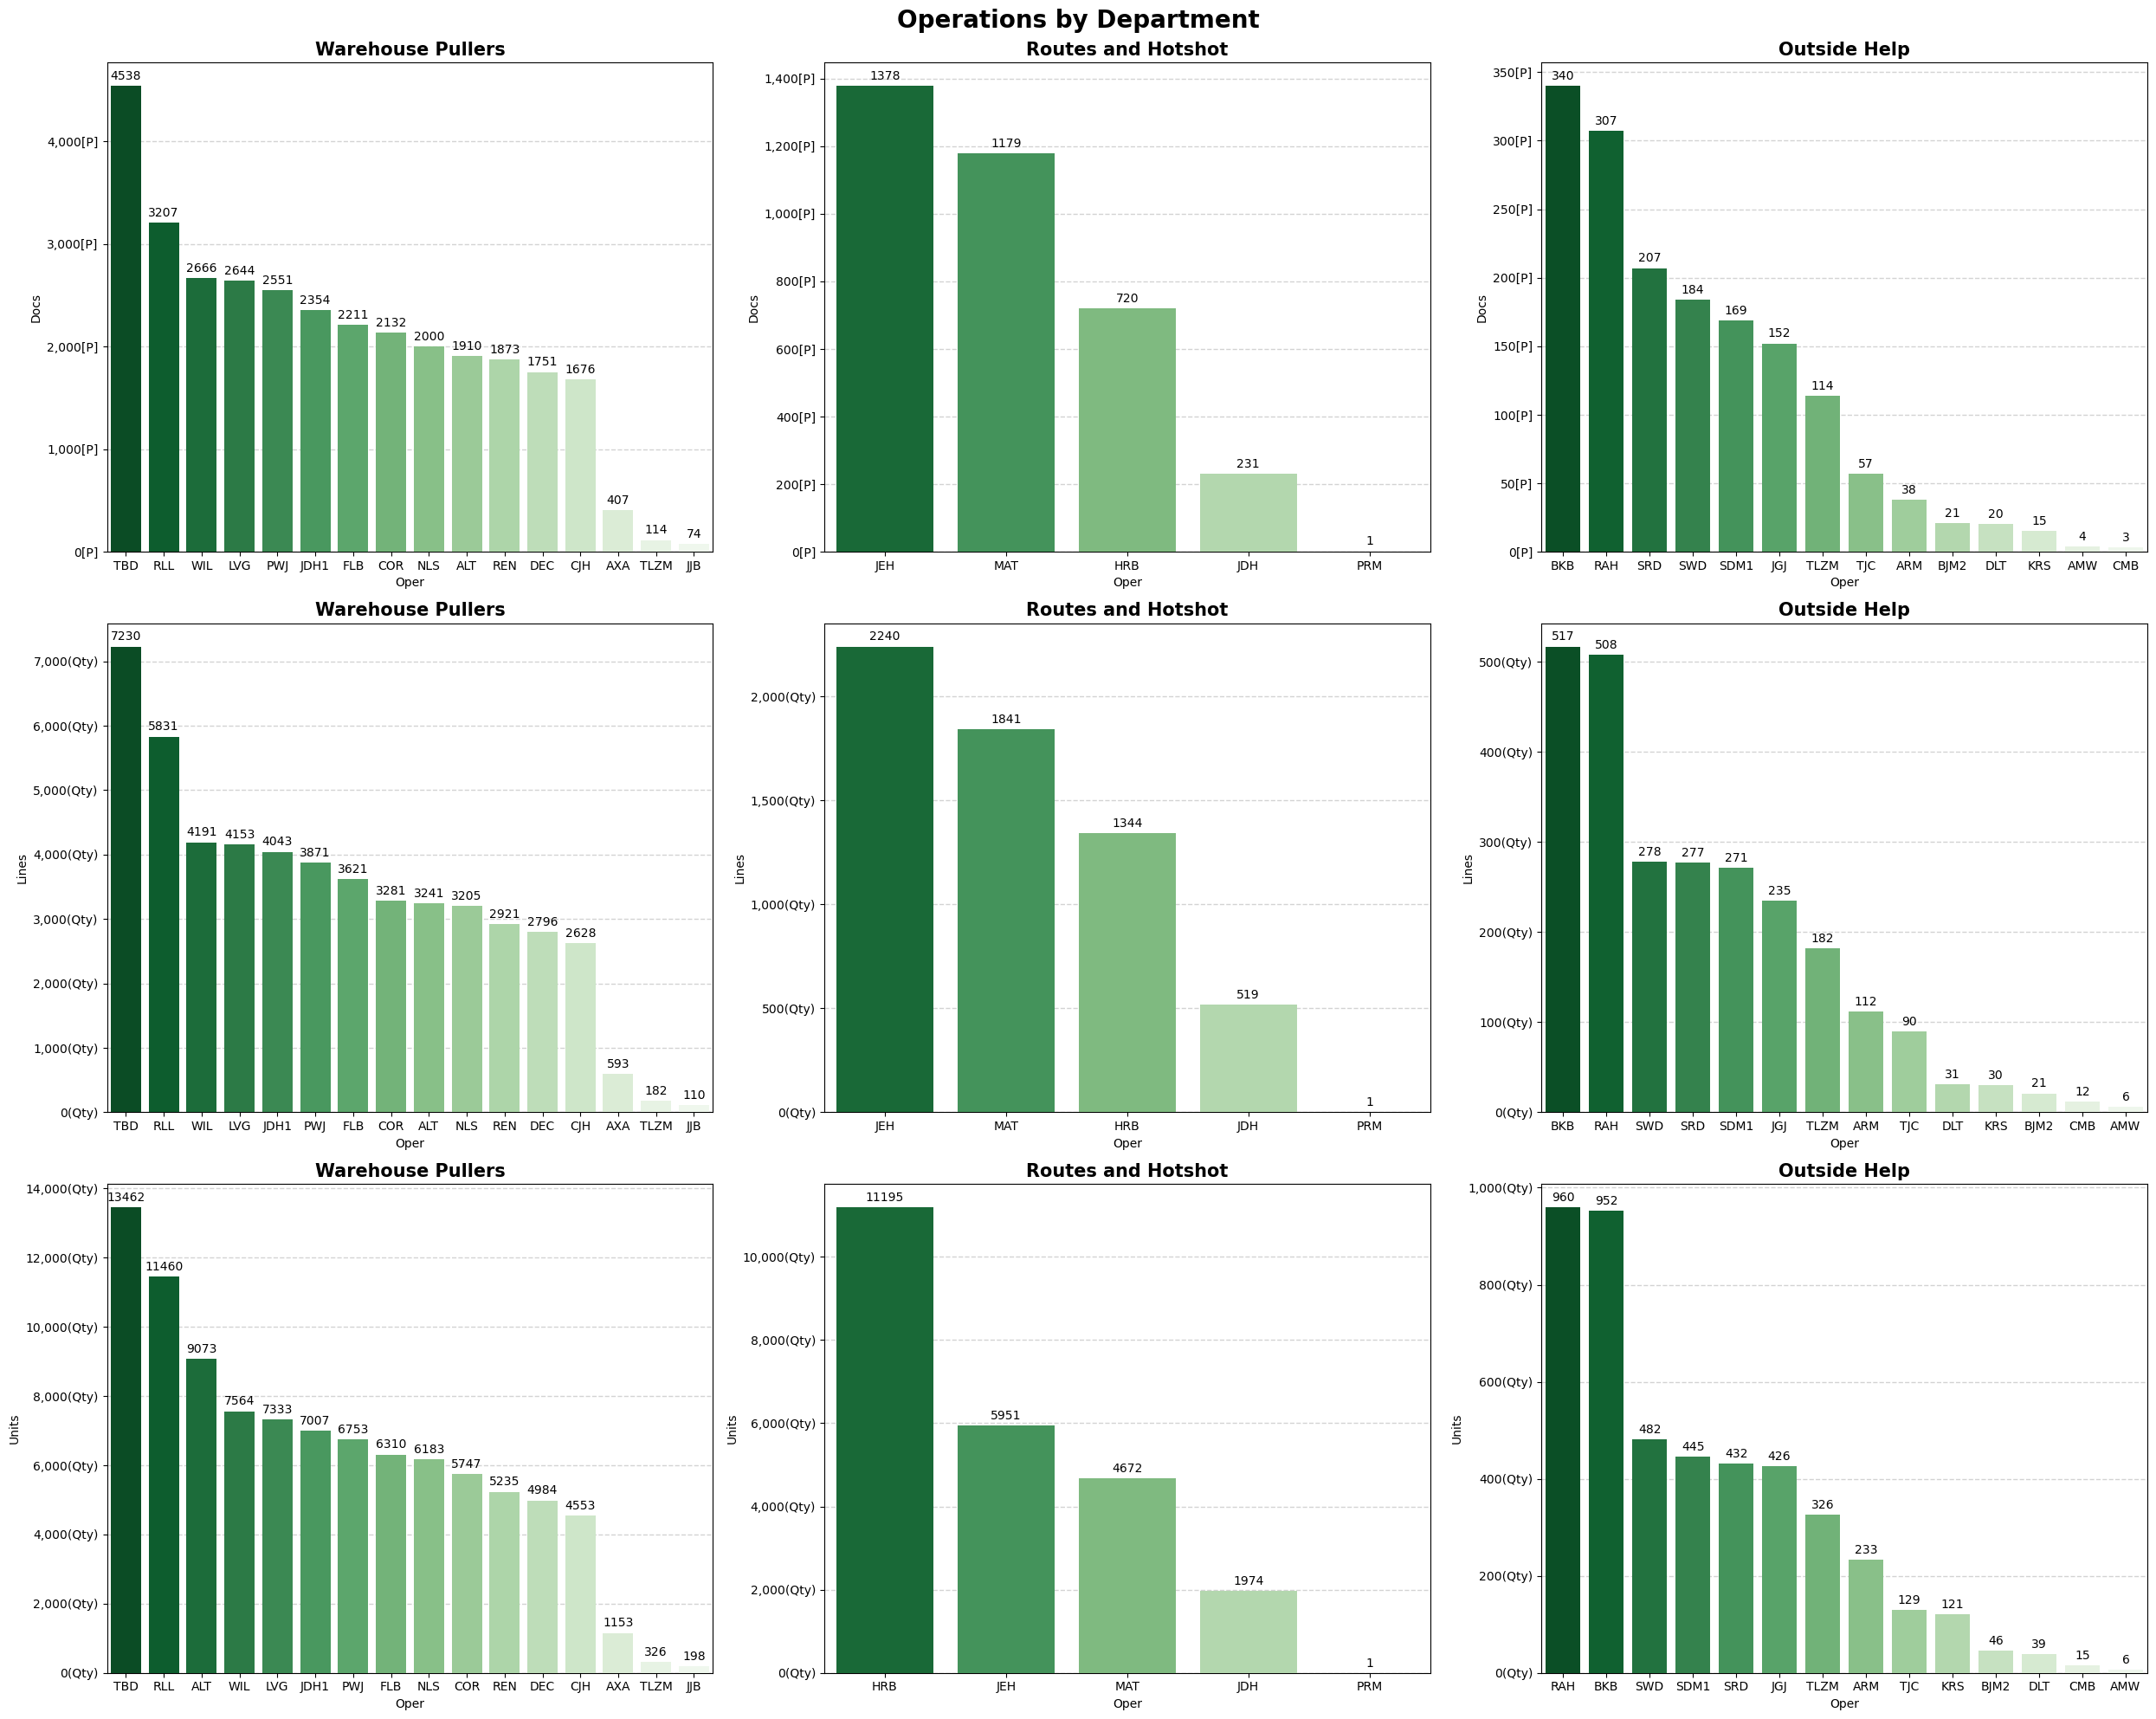

In [57]:
with plt.style.context('seaborn-muted', 'seaborn-poster'):
    fig, ax = plt.subplots(3, 3, figsize=(25, 20))
    
    # Organize by Docs
    sns.barplot(x='Oper', y='Docs', data=op_warehouse.sort_values('Docs', ascending=False), ax=ax[0, 0], zorder=3, palette='Greens_r')
    ax[0,0].set_title('Warehouse Pullers', fontsize=15, fontweight='bold')
    ax[0,0].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[0,0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}[P]'))
    ax[0,0].bar_label(ax[0,0].containers[0], fmt='%d', padding=3)
    sns.barplot(x='Oper', y='Docs', data=op_routes_hotshot.sort_values('Docs', ascending=False), ax=ax[0, 1], zorder=3, palette='Greens_r')
    ax[0,1].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[0,1].set_title('Routes and Hotshot', fontsize=15, fontweight='bold')
    ax[0,1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}[P]'))
    ax[0,1].bar_label(ax[0,1].containers[0], fmt='%d', padding=3)
    sns.barplot(x='Oper', y='Docs', data=op_outside.sort_values('Docs', ascending=False), ax=ax[0, 2], zorder=3, palette='Greens_r')
    ax[0,2].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[0,2].set_title('Outside Help', fontsize=15, fontweight='bold')
    ax[0,2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}[P]'))
    ax[0,2].bar_label(ax[0,2].containers[0], fmt='%d', padding=3)
    
    # Organize by Lines
    sns.barplot(x='Oper', y='Lines', data=op_warehouse.sort_values('Lines', ascending=False), ax=ax[1, 0], zorder=3, palette='Greens_r')
    ax[1,0].set_title('Warehouse Pullers', fontsize=15, fontweight='bold')
    ax[1,0].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[1,0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(Qty)'))
    ax[1,0].bar_label(ax[1,0].containers[0], fmt='%d', padding=3)
    sns.barplot(x='Oper', y='Lines', data=op_routes_hotshot.sort_values('Lines', ascending=False), ax=ax[1, 1], zorder=3, palette='Greens_r')
    ax[1,1].set_title('Routes and Hotshot', fontsize=15, fontweight='bold')
    ax[1,1].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[1,1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(Qty)'))
    ax[1,1].bar_label(ax[1,1].containers[0], fmt='%d', padding=3)
    sns.barplot(x='Oper', y='Lines', data=op_outside.sort_values('Lines', ascending=False), ax=ax[1, 2], zorder=3, palette='Greens_r')
    ax[1,2].set_title('Outside Help', fontsize=15, fontweight='bold')
    ax[1,2].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[1,2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(Qty)'))
    ax[1,2].bar_label(ax[1,2].containers[0], fmt='%d', padding=3)
    
    # Organize by Units
    sns.barplot(x='Oper', y='Units', data=op_warehouse.sort_values('Units', ascending=False), ax=ax[2, 0], zorder=3, palette='Greens_r')
    ax[2,0].set_title('Warehouse Pullers', fontsize=15, fontweight='bold')
    ax[2,0].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[2,0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(Qty)'))
    ax[2,0].bar_label(ax[2,0].containers[0], fmt='%d', padding=3)
    sns.barplot(x='Oper', y='Units', data=op_routes_hotshot.sort_values('Units', ascending=False), ax=ax[2, 1], zorder=3, palette='Greens_r')
    ax[2,1].set_title('Routes and Hotshot', fontsize=15, fontweight='bold')
    ax[2,1].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[2,1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(Qty)'))
    ax[2,1].bar_label(ax[2,1].containers[0], fmt='%d', padding=3)
    sns.barplot(x='Oper', y='Units', data=op_outside.sort_values('Units', ascending=False), ax=ax[2, 2], zorder=3, palette='Greens_r')
    ax[2,2].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[2,2].set_title('Outside Help', fontsize=15, fontweight='bold')
    ax[2,2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(Qty)'))
    ax[2,2].bar_label(ax[2,2].containers[0], fmt='%d', padding=3)
 
plt.suptitle('Operations by Department', fontsize=20, fontweight='bold', y=0.99)   
plt.tight_layout()
plt.show()

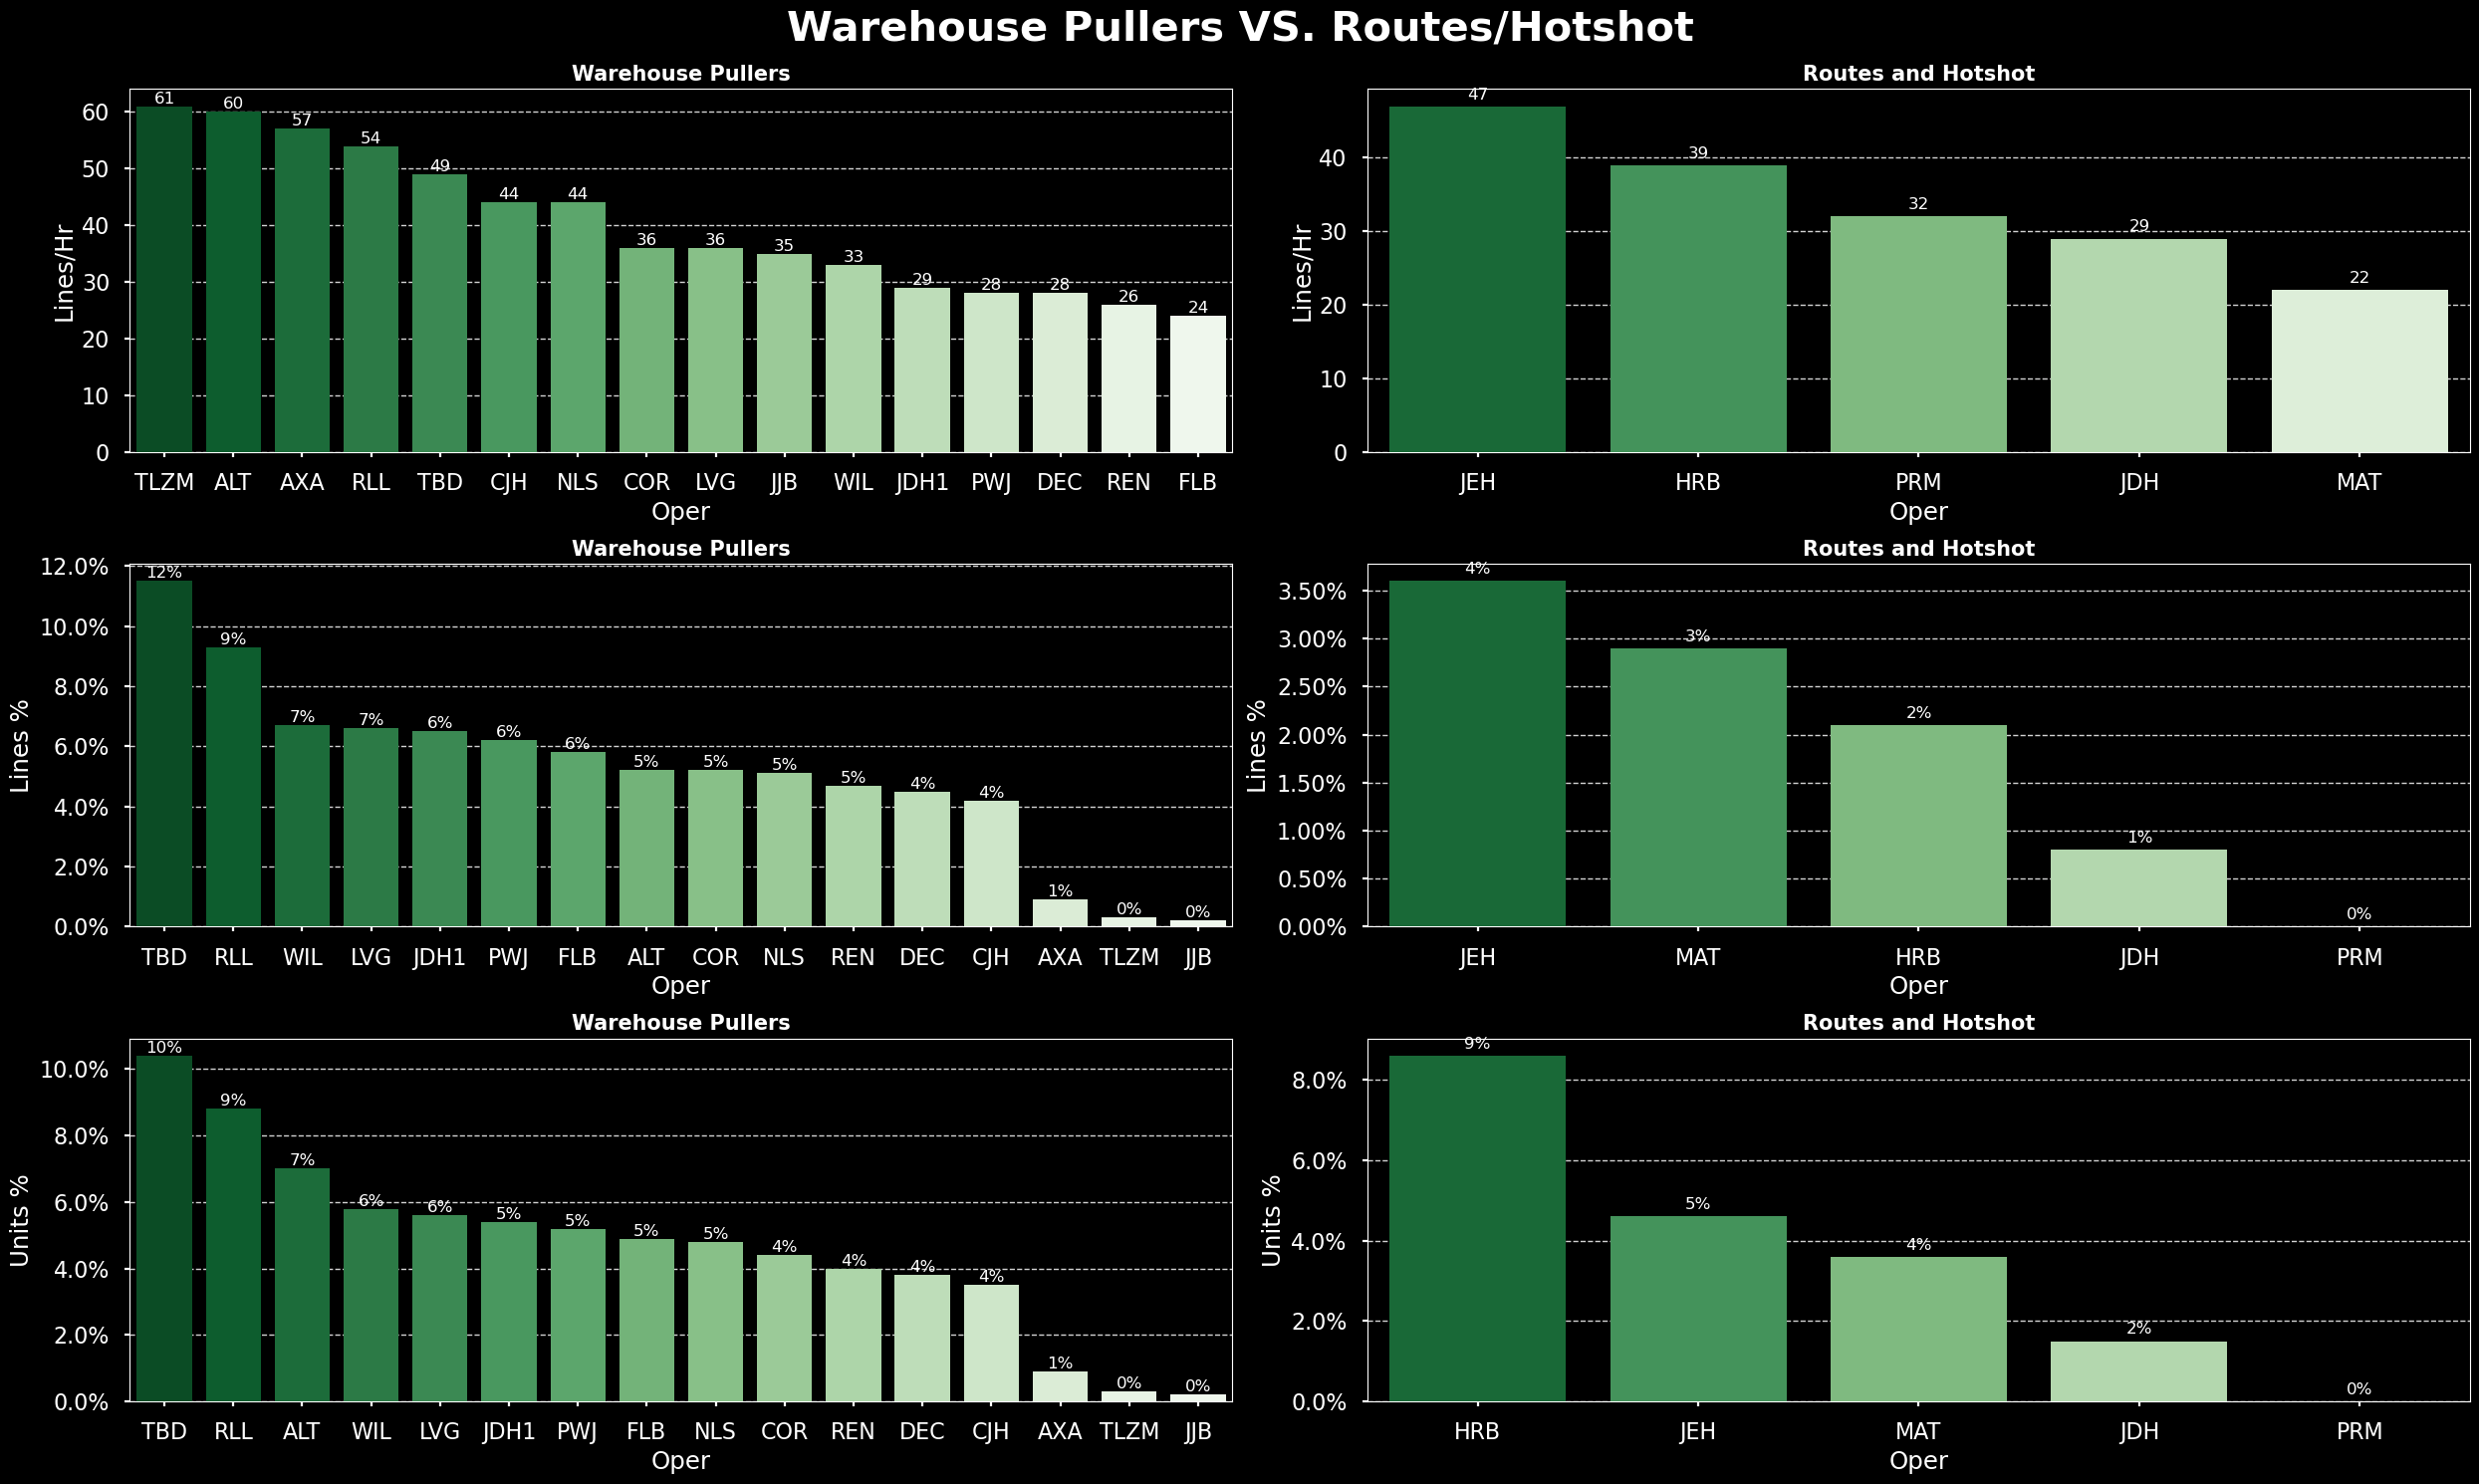

In [58]:
with plt.style.context(['seaborn-muted', 'seaborn-poster', 'dark_background']):
    
    fig, ax = plt.subplots(3, 2, figsize=(25, 15))
    # Organized by warehouse pullers
    sns.barplot(x='Oper', y='Lines/Hr', data=op_warehouse.sort_values('Lines/Hr', ascending=False), ax=ax[0, 0], zorder=3, palette='Greens_r', dodge=False)
    ax[0,0].set_title('Warehouse Pullers', fontsize=15, fontweight='bold')
    ax[0,0].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[0,0].bar_label(ax[0,0].containers[0], fmt='%.0f', fontsize=12, color='white')
    sns.barplot(x='Oper', y='Lines %', data=op_warehouse.sort_values('Lines %', ascending=False), ax=ax[1, 0], zorder=3, palette='Greens_r')
    ax[1,0].set_title('Warehouse Pullers', fontsize=15, fontweight='bold')
    ax[1,0].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[1,0].yaxis.set_major_formatter(ticker.PercentFormatter())
    ax[1,0].bar_label(ax[1,0].containers[0], fmt='%.0f%%', fontsize=12, color='white')
    sns.barplot(x='Oper', y='Units %', data=op_warehouse.sort_values('Units %', ascending=False), ax=ax[2, 0], zorder=3, palette='Greens_r')
    ax[2,0].set_title('Warehouse Pullers', fontsize=15, fontweight='bold')
    ax[2,0].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[2,0].yaxis.set_major_formatter(ticker.PercentFormatter())
    ax[2,0].bar_label(ax[2,0].containers[0], fmt='%.0f%%', fontsize=12, color='white')
    
    # Organized by Routes and Hotshot
    sns.barplot(x='Oper', y='Lines/Hr', data=op_routes_hotshot.sort_values('Lines/Hr', ascending=False), ax=ax[0, 1], zorder=3, palette='Greens_r')
    ax[0,1].set_title('Routes and Hotshot', fontsize=15, fontweight='bold')
    ax[0,1].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[0,1].bar_label(ax[0,1].containers[0], fmt='%.0f', padding=3, fontsize=12, color='white')
    sns.barplot(x='Oper', y='Lines %', data=op_routes_hotshot.sort_values('Lines %', ascending=False), ax=ax[1, 1], zorder=3, palette='Greens_r')
    ax[1,1].set_title('Routes and Hotshot', fontsize=15, fontweight='bold')
    ax[1,1].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[1,1].yaxis.set_major_formatter(ticker.PercentFormatter())
    ax[1,1].bar_label(ax[1,1].containers[0], fmt='%.0f%%', padding=3, fontsize=12, color='white')
    sns.barplot(x='Oper', y='Units %', data=op_routes_hotshot.sort_values('Units %', ascending=False), ax=ax[2, 1], zorder=3, palette='Greens_r')
    ax[2,1].set_title('Routes and Hotshot', fontsize=15, fontweight='bold')
    ax[2,1].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1)
    ax[2,1].yaxis.set_major_formatter(ticker.PercentFormatter())
    ax[2,1].bar_label(ax[2,1].containers[0], fmt='%.0f%%', padding=3, fontsize=12, color='white')
plt.suptitle('Warehouse Pullers VS. Routes/Hotshot', fontsize=30, fontweight='bold', color='white', y=0.99)
plt.tight_layout()
plt.show();

C:\Users\zachd\AppData\Local\Temp\ipykernel_6680\2093041109.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(fontsize=10, labels=np.arange(0, max(time_convert(df, x)) + 1, 10))
C:\Users\zachd\AppData\Local\Temp\ipykernel_6680\2093041109.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(fontsize=10, labels=np.arange(0, max(time_convert(df, x)) + 1, 10))
C:\Users\zachd\AppData\Local\Temp\ipykernel_6680\2093041109.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(fontsize=10, labels=np.arange(0, max(time_convert(df, x)) + 1, 10))


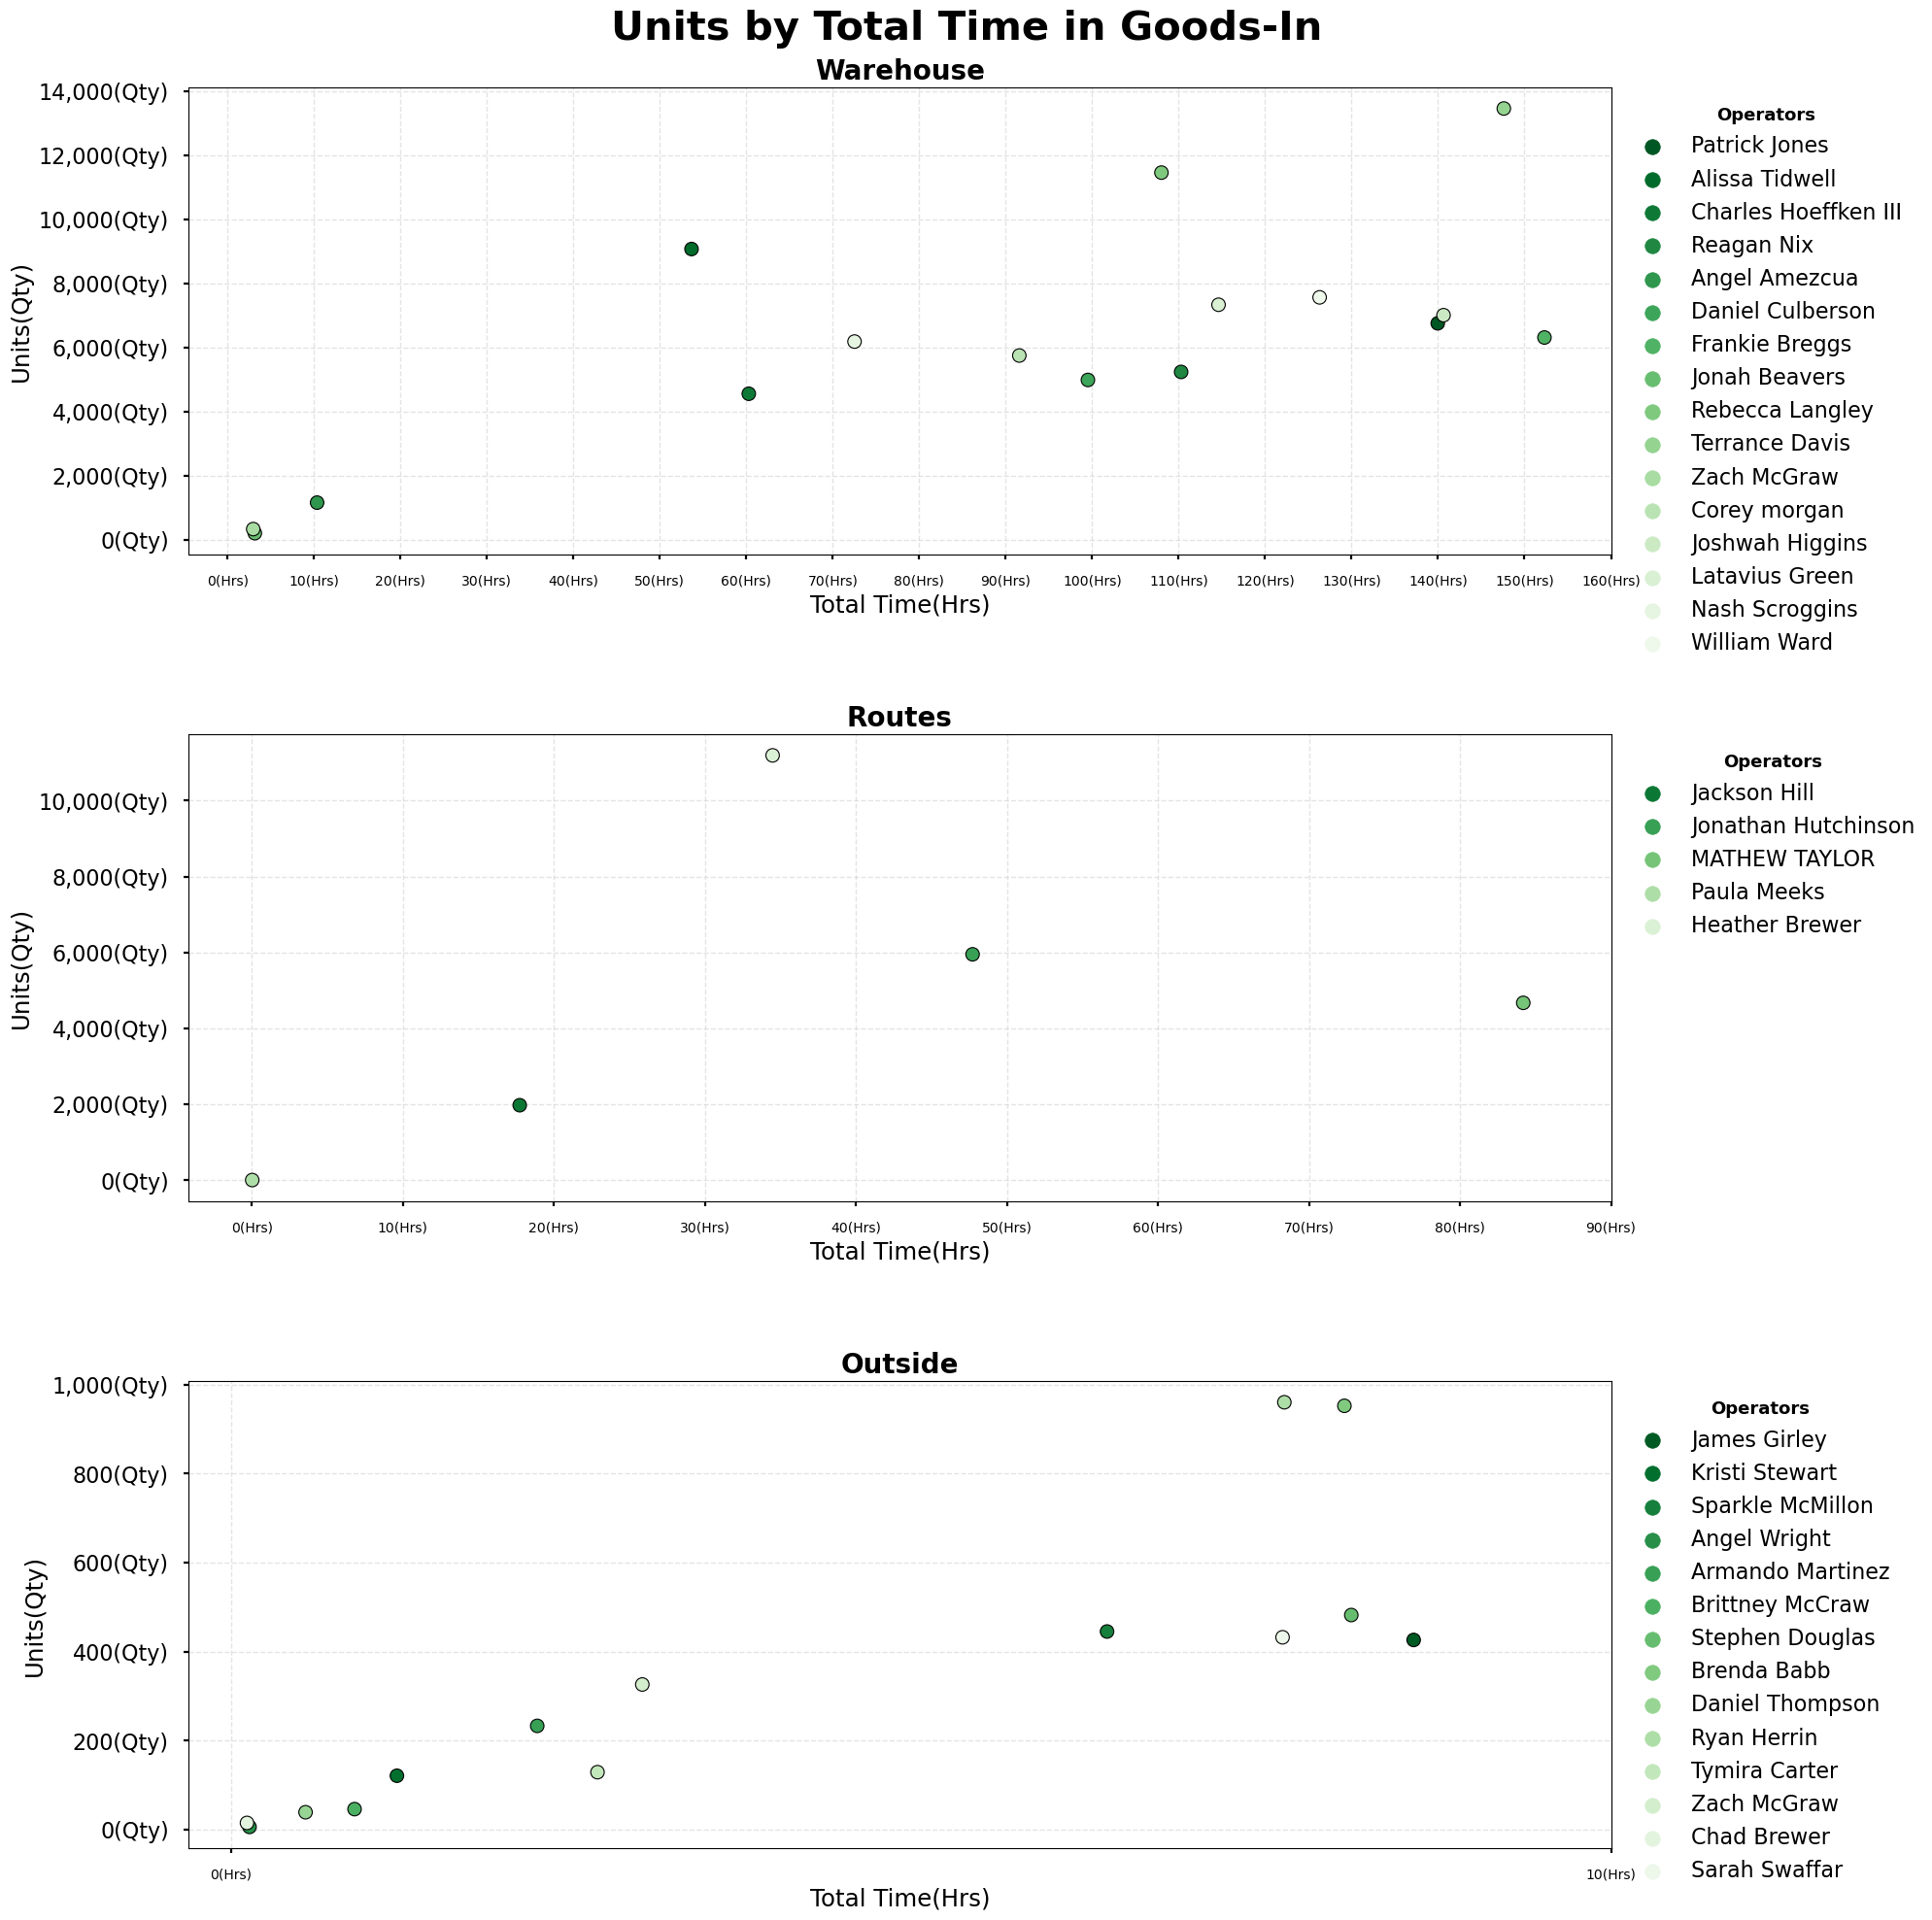

In [59]:
list_df = [op_warehouse, op_routes_hotshot, op_outside]
title = ['Warehouse', 'Routes', 'Outside']

scatterplots('Total Time', 'Units', title, list_df, 3, 1)

---

## Stockers

---

In [60]:
oa_night = pd.read_excel('OA_Stockers.xls', sheet_name='Night Stockers')
oa_day = pd.read_excel('OA_Stockers.xls', sheet_name='Day Stockers')
oa_pullers = pd.read_excel('OA_Stockers.xls', sheet_name='Pullers')
oa_others = pd.read_excel('OA_Stockers.xls', sheet_name='Outside Help')

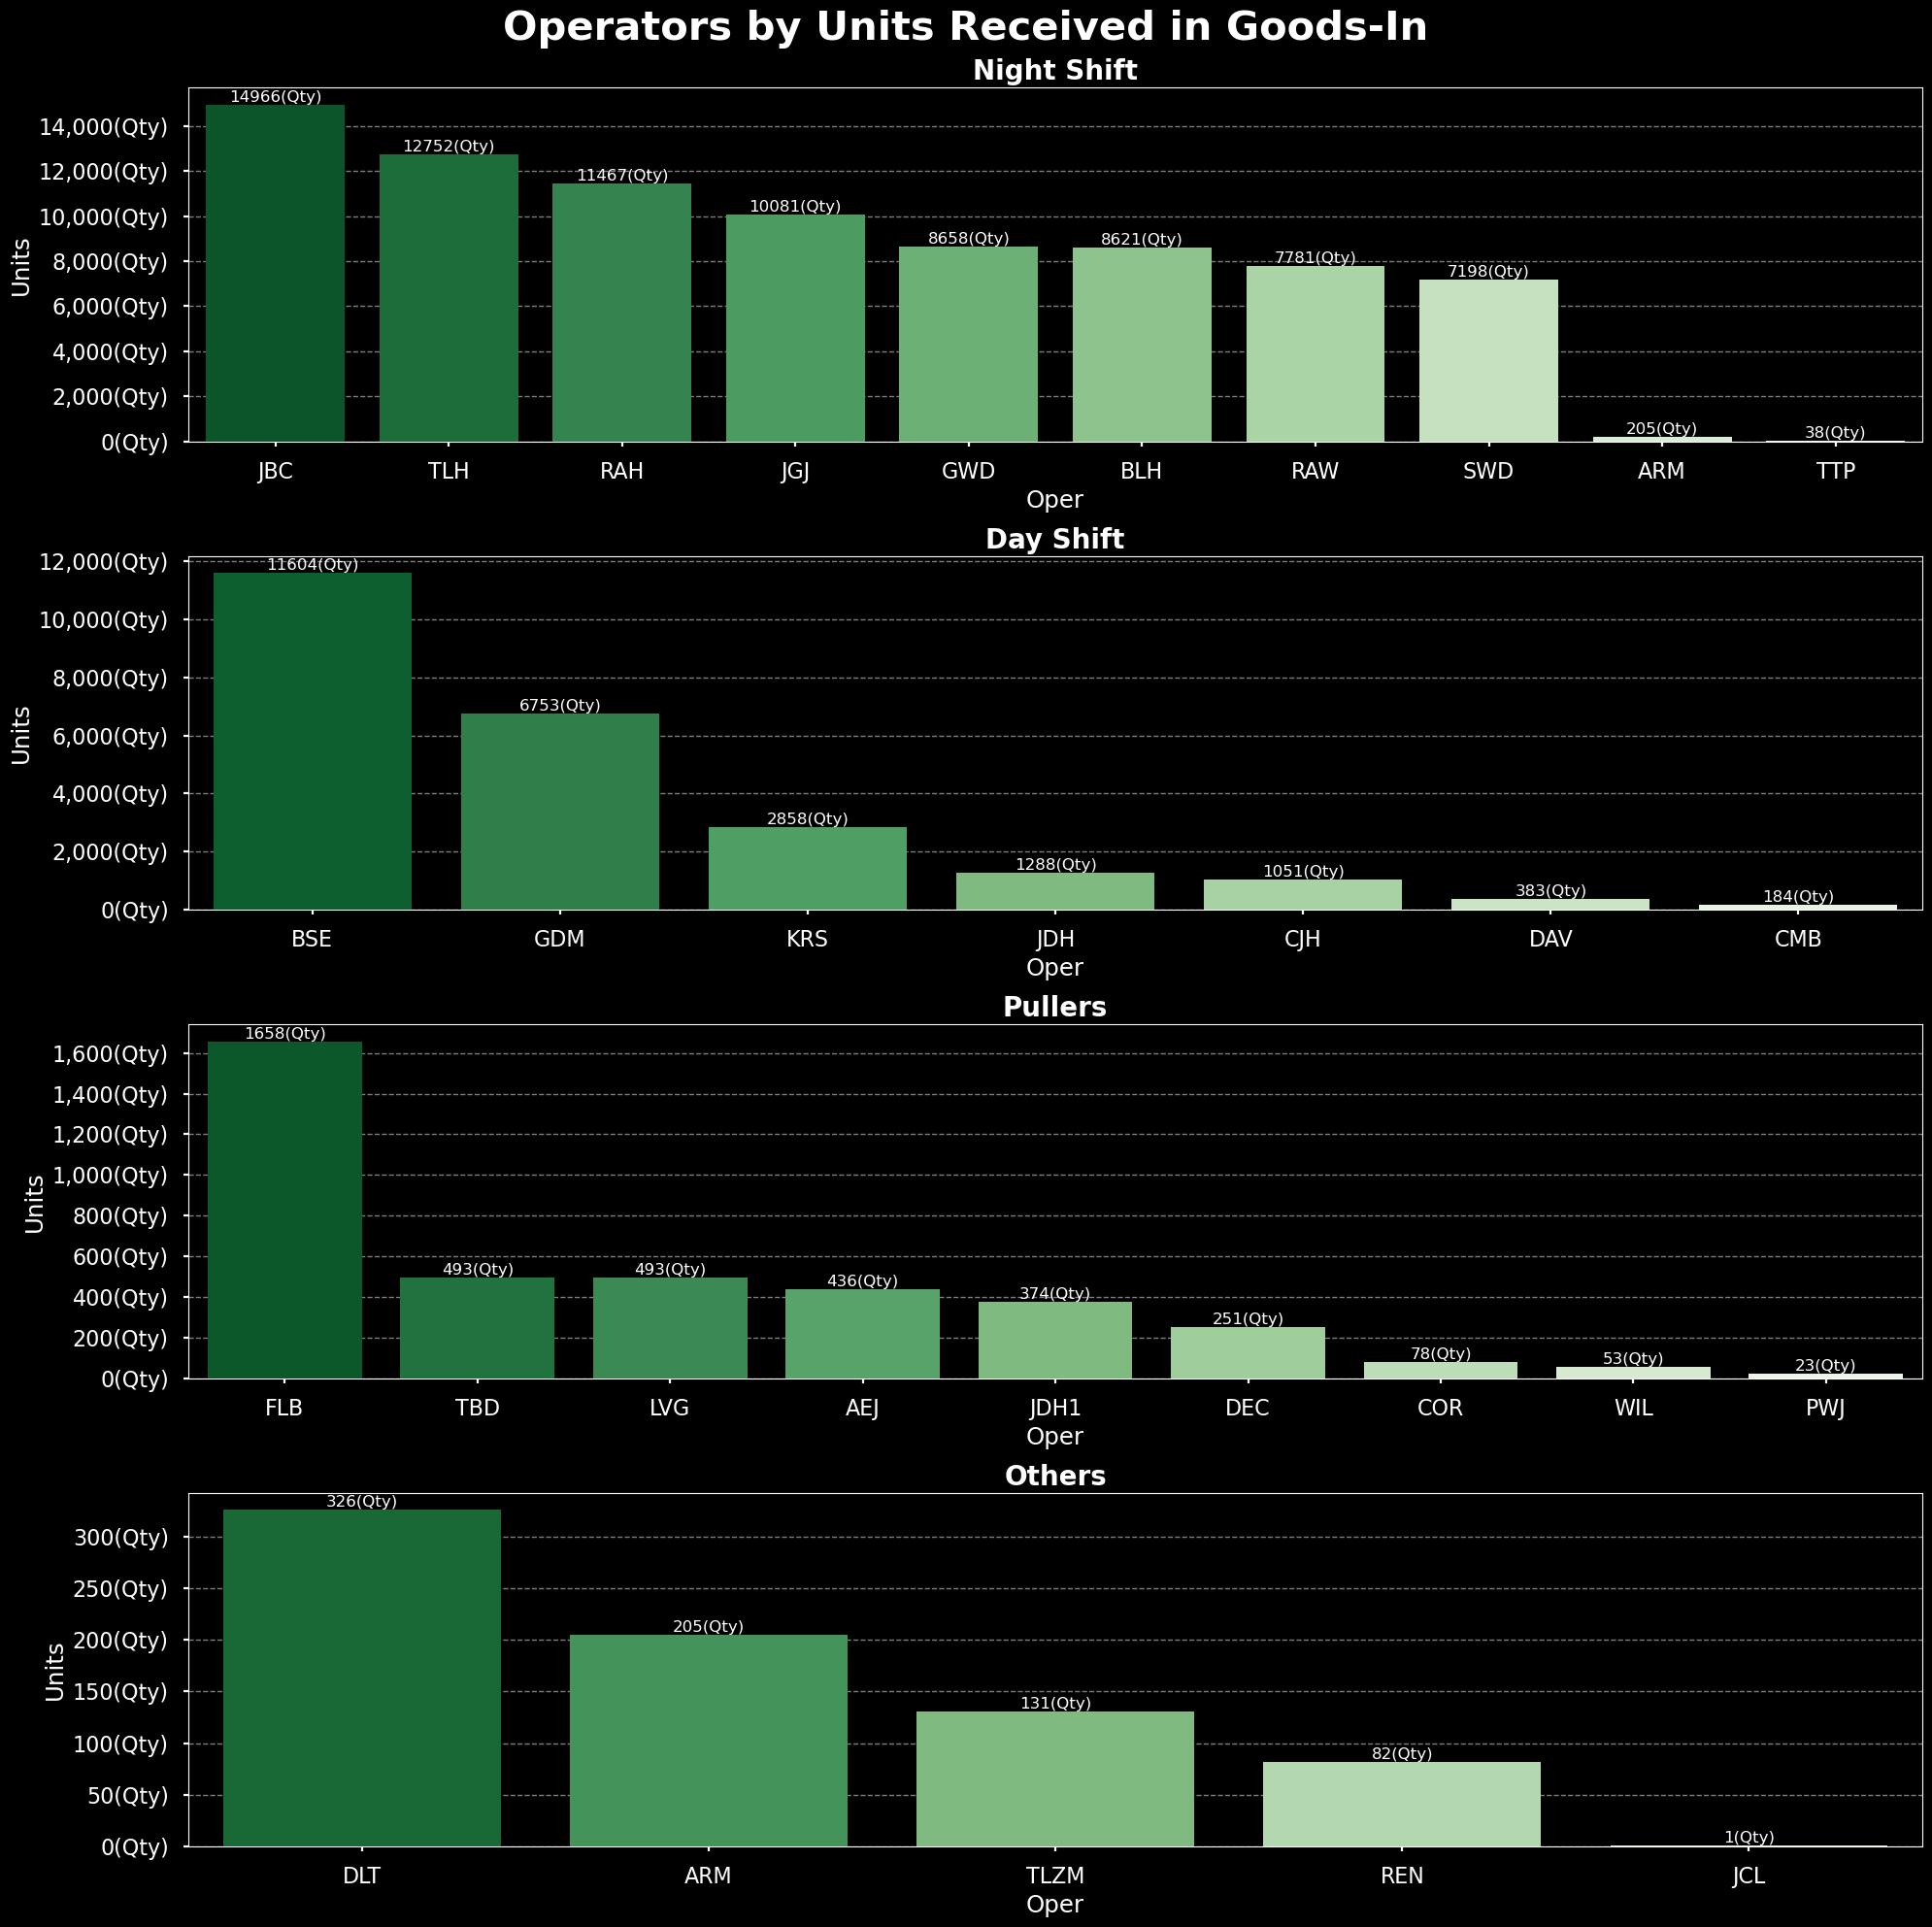

In [61]:
with plt.style.context(['seaborn-muted', 'seaborn-poster', 'dark_background']):
    
    fig, ax = plt.subplots(4, 1, figsize=(20, 20))

    # Organized by Night Shift
    sns.barplot(x='Oper', y='Units', data=oa_night.sort_values('Units', ascending=False), ax=ax[0], zorder=3, palette='Greens_r')
    ax[0].set_title('Night Shift', fontsize=20, fontweight='bold')
    ax[0].bar_label(ax[0].containers[0], fmt='%.0f(Qty)', fontsize=12, color='white')
    ax[0].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1, alpha=0.6)
    ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(Qty)'))
    # Organized by Day Shift
    sns.barplot(x='Oper', y='Units', data=oa_day.sort_values('Units', ascending=False), ax=ax[1], zorder=3, palette='Greens_r')
    ax[1].set_title('Day Shift', fontsize=20, fontweight='bold')
    ax[1].bar_label(ax[1].containers[0], fmt='%.0f(Qty)', fontsize=12, color='white')
    ax[1].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1, alpha=0.6)
    ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(Qty)'))
    # Organized by Pullers
    sns.barplot(x='Oper', y='Units', data=oa_pullers.sort_values('Units', ascending=False), ax=ax[2], zorder=3, palette='Greens_r')
    ax[2].set_title('Pullers', fontsize=20, fontweight='bold')
    ax[2].bar_label(ax[2].containers[0], fmt='%.0f(Qty)', fontsize=12, color='white')
    ax[2].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1, alpha=0.6)
    ax[2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(Qty)'))
    # Organized by Others
    sns.barplot(x='Oper', y='Units', data=oa_others.sort_values('Units', ascending=False), ax=ax[3], zorder=3, palette='Greens_r')
    ax[3].set_title('Others', fontsize=20, fontweight='bold')
    ax[3].bar_label(ax[3].containers[0], fmt='%.0f(Qty)', fontsize=12, color='white')
    ax[3].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1, alpha=0.6)
    ax[3].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(Qty)'))
    
plt.suptitle('Operators by Units Received in Goods-In', fontsize=30, fontweight='bold', color='white', y=0.99)
plt.tight_layout()
plt.show();

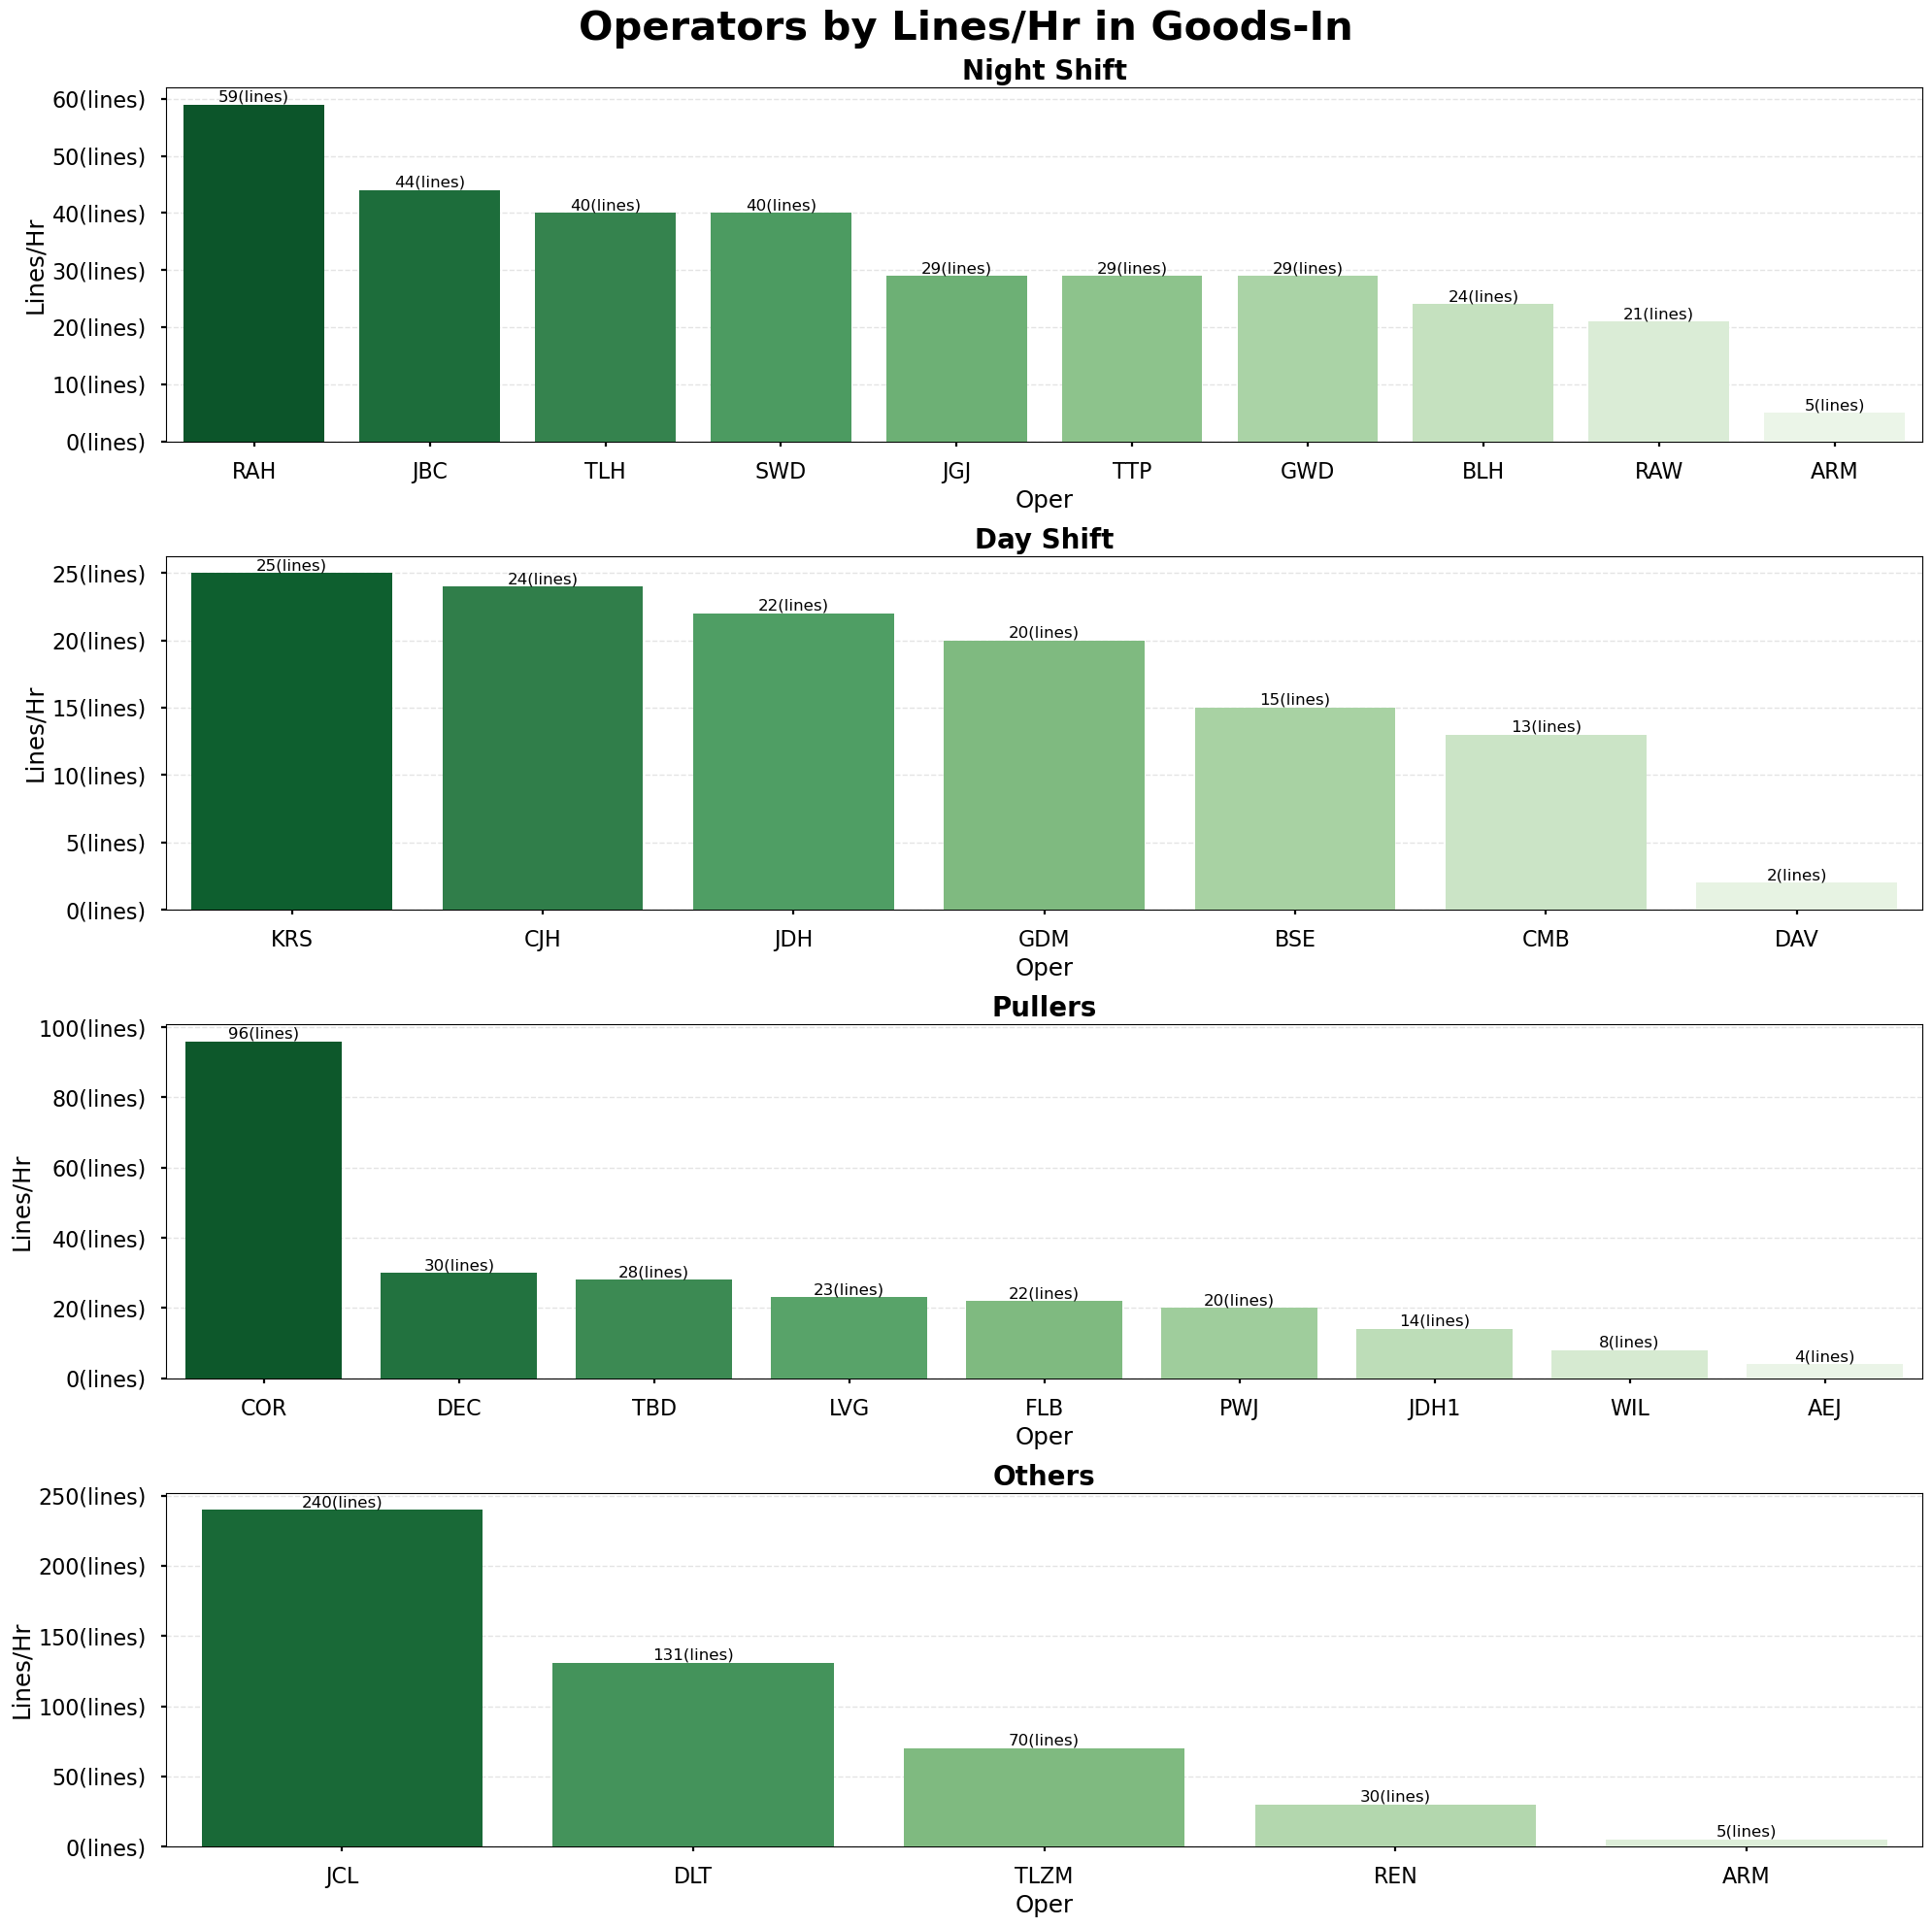

In [62]:
with plt.style.context(['seaborn-muted', 'seaborn-poster']):
    
    fig, ax = plt.subplots(4, 1, figsize=(20, 20))

    # Organized by Night Shift
    sns.barplot(x='Oper', y='Lines/Hr', data=oa_night.sort_values('Lines/Hr', ascending=False), ax=ax[0], zorder=3, palette='Greens_r')
    ax[0].set_title('Night Shift', fontsize=20, fontweight='bold')
    ax[0].bar_label(ax[0].containers[0], fmt='%.0f(lines)', fontsize=12)
    ax[0].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1, alpha=0.6)
    ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(lines)'))
    # Organized by Day Shift
    sns.barplot(x='Oper', y='Lines/Hr', data=oa_day.sort_values('Lines/Hr', ascending=False), ax=ax[1], zorder=3, palette='Greens_r')
    ax[1].set_title('Day Shift', fontsize=20, fontweight='bold')
    ax[1].bar_label(ax[1].containers[0], fmt='%.0f(lines)', fontsize=12)
    ax[1].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1, alpha=0.6)
    ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(lines)'))
    # Organized by Pullers
    sns.barplot(x='Oper', y='Lines/Hr', data=oa_pullers.sort_values('Lines/Hr', ascending=False), ax=ax[2], zorder=3, palette='Greens_r')
    ax[2].set_title('Pullers', fontsize=20, fontweight='bold')
    ax[2].bar_label(ax[2].containers[0], fmt='%.0f(lines)', fontsize=12)
    ax[2].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1, alpha=0.6)
    ax[2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(lines)'))
    # Organized by Others
    sns.barplot(x='Oper', y='Lines/Hr', data=oa_others.sort_values('Lines/Hr', ascending=False), ax=ax[3], zorder=3, palette='Greens_r')
    ax[3].set_title('Others', fontsize=20, fontweight='bold')
    ax[3].bar_label(ax[3].containers[0], fmt='%.0f(lines)', fontsize=12)
    ax[3].grid(True, axis='y', zorder=0, color='lightgrey', linestyle='--', linewidth=1, alpha=0.6)
    ax[3].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}(lines)'))
    
plt.suptitle('Operators by Lines/Hr in Goods-In', fontsize=30, fontweight='bold', y=0.99)
plt.tight_layout()
plt.show();

In [63]:
title = ['Night Shift', 'Day Shift', 'Pullers', 'Others']
list_df = [oa_night, oa_day, oa_pullers, oa_others]

C:\Users\zachd\AppData\Local\Temp\ipykernel_6680\2093041109.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(fontsize=10, labels=np.arange(0, max(time_convert(df, x)) + 1, 10))
C:\Users\zachd\AppData\Local\Temp\ipykernel_6680\2093041109.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(fontsize=10, labels=np.arange(0, max(time_convert(df, x)) + 1, 10))
C:\Users\zachd\AppData\Local\Temp\ipykernel_6680\2093041109.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(fontsize=10, labels=np.arange(0, max(time_convert(df, x)) + 1, 10))
C:\Users\zachd\AppData\Local\Temp\ipykernel_6680\2093041109.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(fontsize=10, labels=np.arange(0, max(time_convert(df, x)) + 1, 10))


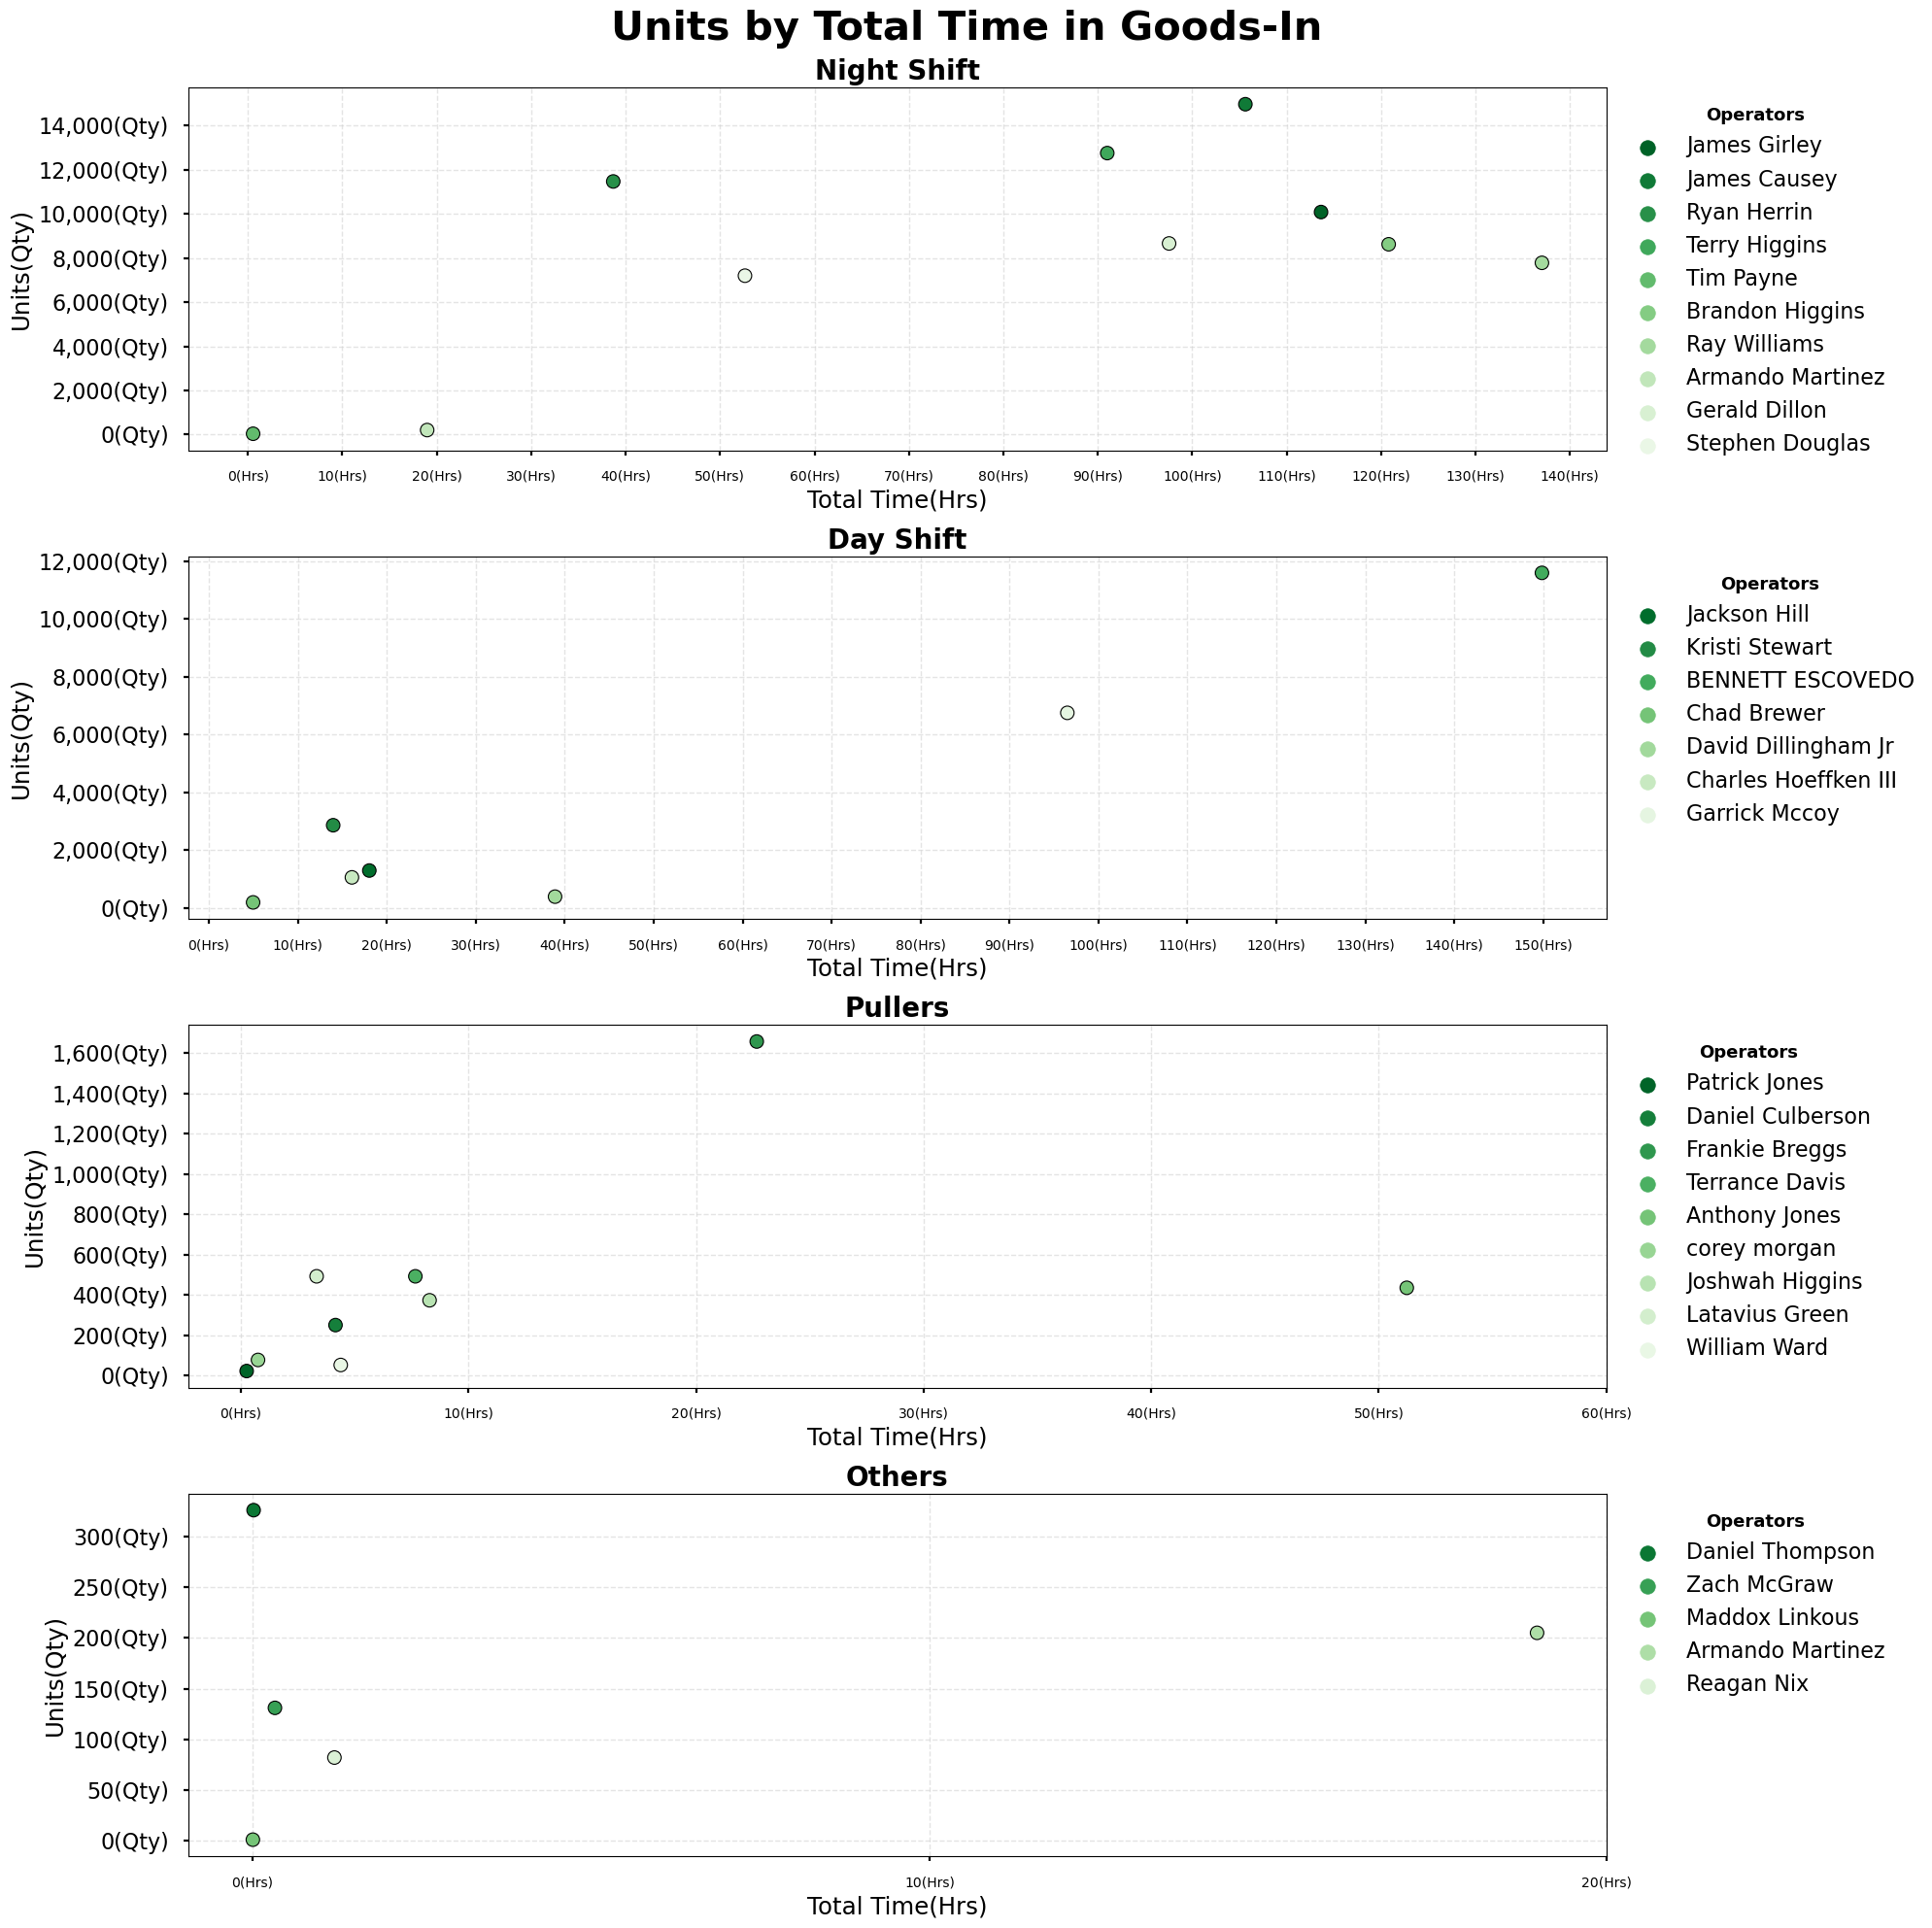

In [64]:
scatterplots('Total Time', 'Units', title, list_df, 4, 1)